In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy.stats import pointbiserialr, kendalltau
import numpy as np
import warnings
from scipy import stats

# Análisis de exploratorio de datos.

Gráficas a realizar
1. Número de homicidios por accidente.
2. Número de accidentes por año.
3. Número de accidentes por mes.
4. Número de accidentes por día de la semana.
5. Número de accidentes por hora.
6. Número de accidentes por tipo de calle.
7. Número de accidentes por comuna.
8. Número de accidentes por participante.
9. Número de accidentes por victima.
10. Número de accidentes por acusado.
11. Matriz de correlación hechos.
12. Número de víctimas por rol.
13. Numero de victimas por rol y sexo.
14. Días en que fallecieron las víctimas luego del accidente.
15. Tabla: Días en que fallecieron las víctimas luego del accidente.
16. Distribución de víctimas por rango hetáreo.
17. Verificacion de Outlieres.

Pasos a hacer en cada Gráfica:
- Creación de Gráficas.
- Análisis y conclusiones.

#### 1. Cargo mis dataframes

In [83]:
dfhomicidiosHechos=pd.read_csv("DatasetsEDA/dfhomicidiosHechos.csv")
dfhomicidiosHechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


#### 1. Número de homicidios por accidente.
- Análisis y conclusiones: 
  - Vemos una altísima probabilidad de que haya solo un homicidio en cada accidente.
  - Además en ningún accidente hubieron 4 o mas homicidios.
  - Otra relación a tener en cuenta es que debido al alto porcentaje de 1 homicidio por cada accidente, podemos inducir que **hay un homicidio por cada accidente** (Esta relación la voy a tener en cuenta a partir de acá para el resto de gráficos).

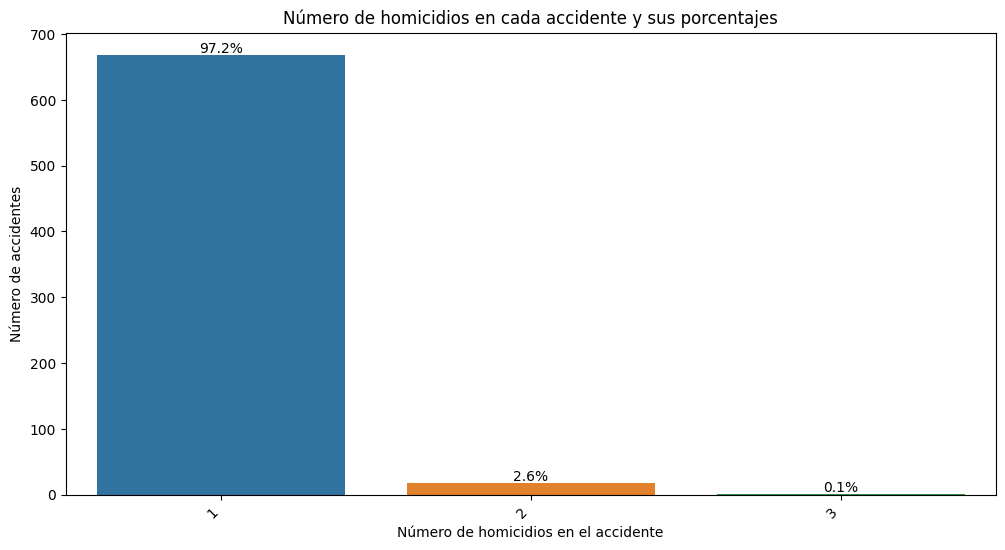

In [4]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='N_VICTIMAS', data=dfhomicidiosHechos)
plt.title('Número de homicidios en cada accidente y sus porcentajes')
plt.xlabel('Número de homicidios en el accidente')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total = len(dfhomicidiosHechos['N_VICTIMAS'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha='center')

plt.show()

#### 2. Número de accidentes por año.
- Análisis y conclusiones: 
  - Notamos como hubo una gran baja entre el año 2018 al 2019.
  - Tambien se puede ver como el año 2020 fue el año donde hubieron menos accidentes , esto probablemente ya que ese año fue la pandemia y por lo tanto hubo mucho menos circulación de automotores.
  - Además podemos notar como el año siguiente  (2021) volvieron a subir los accidentes, esto probablemente ya que se levanto el toque de queda de la pandemia.

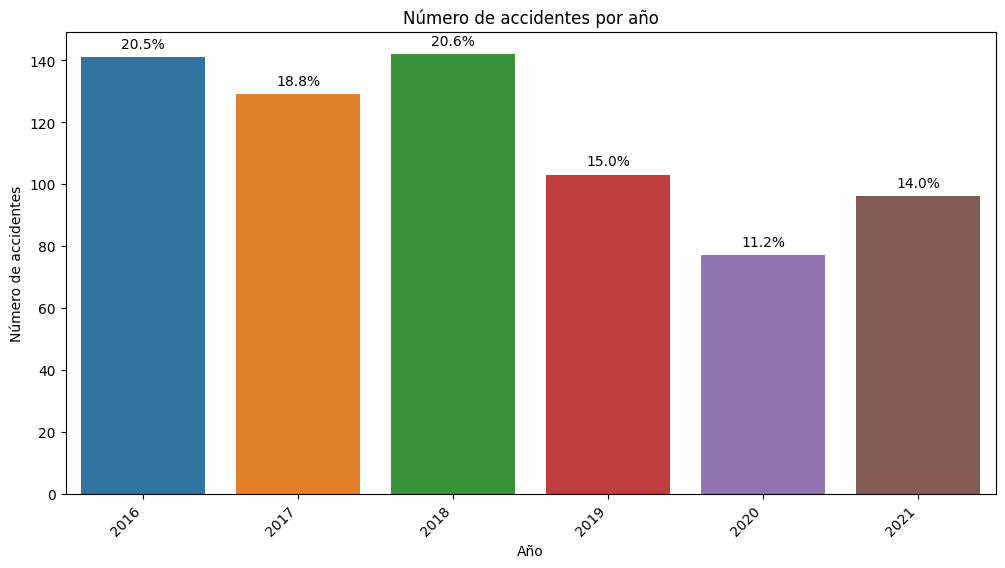

In [5]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='AAAA', data=dfhomicidiosHechos)
plt.title('Número de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos['AAAA'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.show()

#### 3. Número de accidentes por mes.
- Análisis y conclusiones:
  - Notamos como el mes donde hay mas accidentes es en diciembre, es posible ya que este mes en Argentina y en Latinoamérica son las Fiestas de fin de año y las personas suelen tomar menos medidas de control al manejar.
  - En conclusión, al no haber un pico grande de diferencia entre meses (y al no notar un comportamiento) concluyo que este gráfico **no arroja una conclusión relevante**.

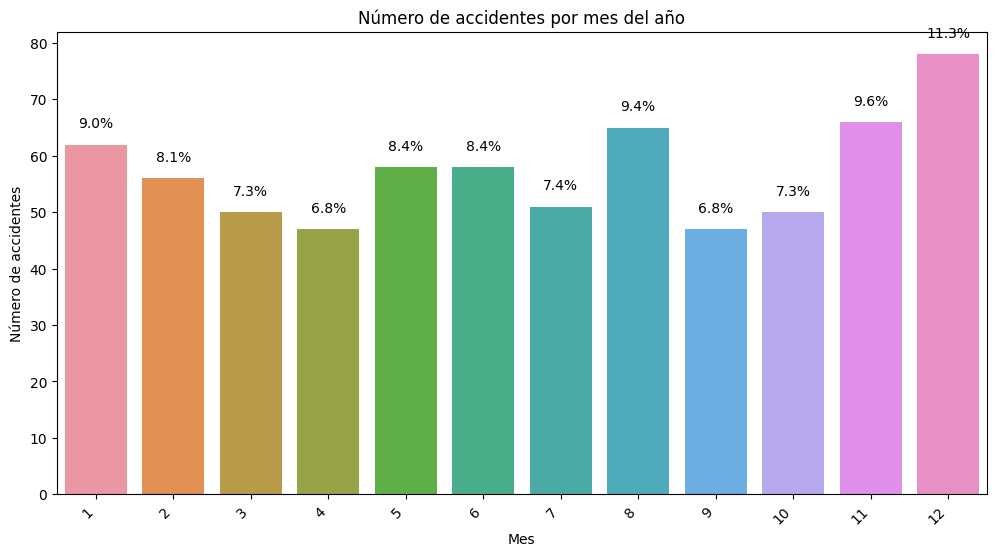

In [6]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='MM', data=dfhomicidiosHechos)
plt.title('Número de accidentes por mes del año')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos['AAAA'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.show()

#### 4. Número de accidentes por día de la semana.
- Análisis y conclusiones:
  - Vemos como no hay una diferencia significativa en que día ocurre el accidente.
  - Hice este gráfico porque pensé que los fin de semana iban a ser los días en los que hubiera mas accidentes pero **no arrojaron ningún dato relevante**.

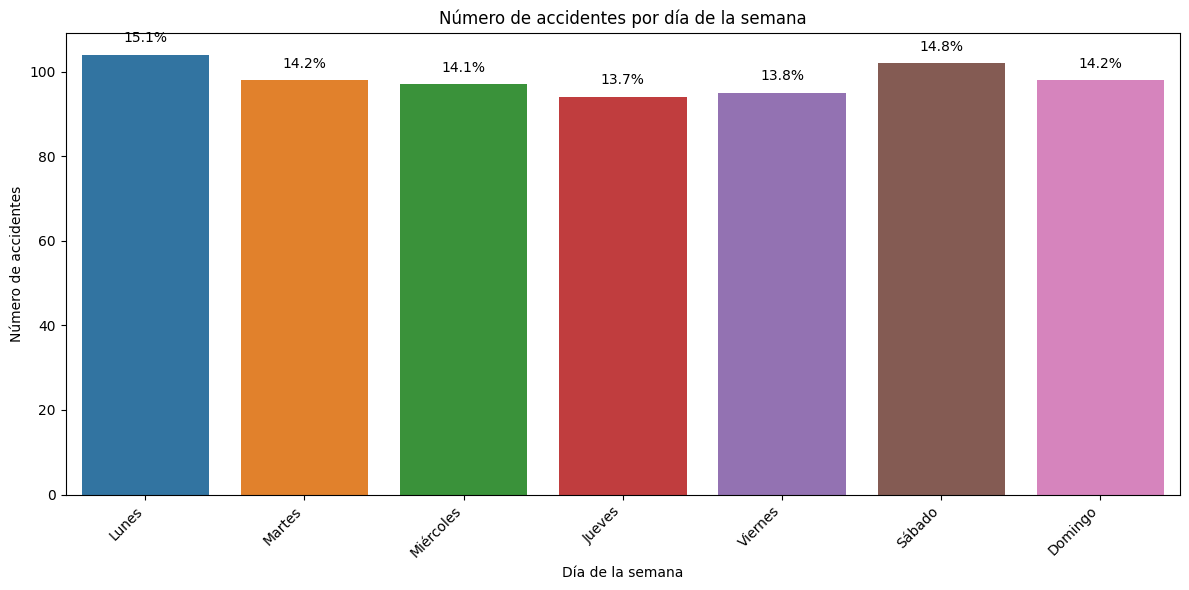

In [22]:
# Extrae el día de la semana en español de la columna de fechas
dfhomicidiosHechos = dfhomicidiosHechos.reset_index(drop=True)
dfhomicidiosHechos['FECHA'] = pd.to_datetime(dfhomicidiosHechos['FECHA'])
dfhomicidiosHechos['DIA_SEMANA'] = dfhomicidiosHechos['FECHA'].dt.dayofweek
dfhomicidiosHechos['DIA_SEMANA'] = dfhomicidiosHechos['DIA_SEMANA'].map({0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'})

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='DIA_SEMANA', data=dfhomicidiosHechos, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Número de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 5. Número de accidentes por hora.
- Análisis y conclusiones:
  - Notamos que los horarios en los que hay mas accidentes son los horarios de la mañana de 7, 6, 5, 9 horas, Esto probablemente ya que estos son los horarios en los que las personas se están transladando a sus actividades diarias.

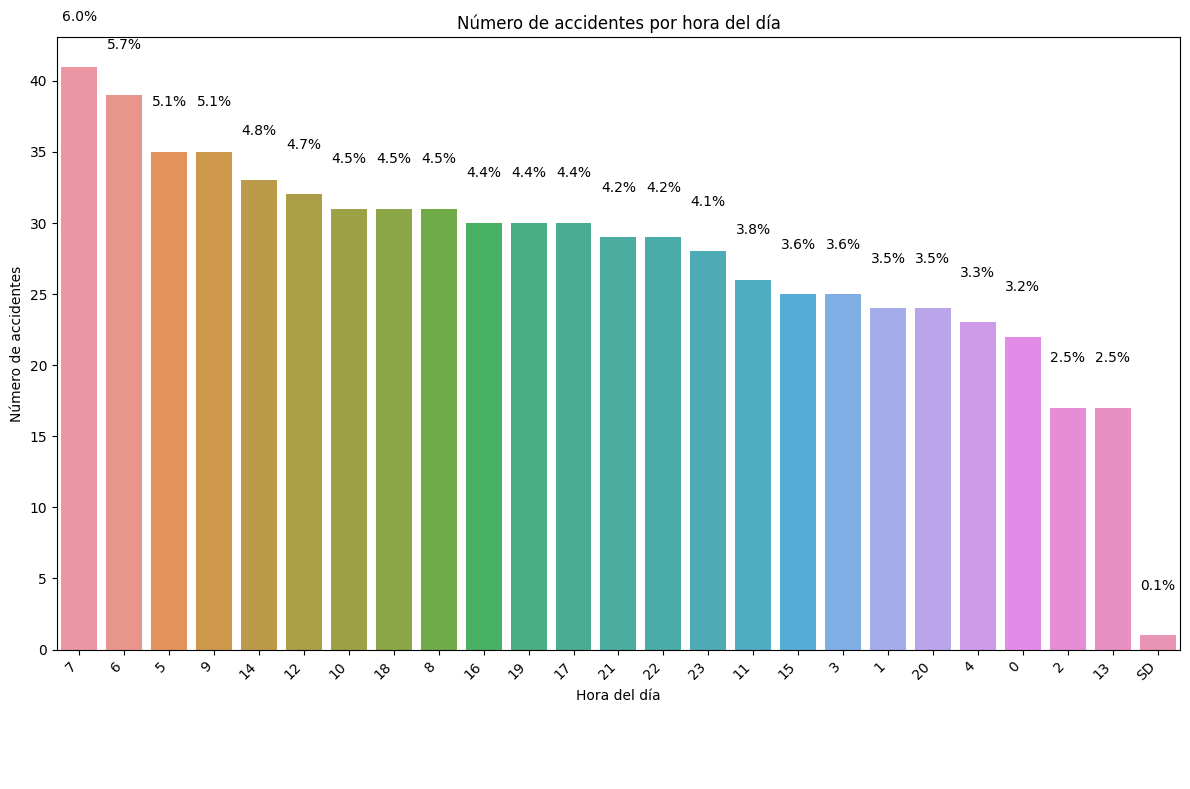

In [23]:
# Gráfico de barras
plt.figure(figsize=(12, 8))  # Aumentar la altura del gráfico.

# Ordenar las horas por el número de homicidios de manera decreciente.
horas_ordenadas = dfhomicidiosHechos['HH'].value_counts().index

# Crear el gráfico de barras.
sns.countplot(x='HH', data=dfhomicidiosHechos, order=horas_ordenadas)

plt.title('Número de accidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x.
plt.xticks(rotation=45, ha='right')

# Añadir porcentaje en la parte superior de la barra.
total_barras = len(dfhomicidiosHechos)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center', va='bottom')

# Añadir porcentaje dentro del recuadro del gráfico.
plt.text(0.5, -0.2, ' ', ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

#### 6. Número de accidentes por tipo de calle.
- Análisis y conclusiones:
  - Notamos que en las avenidas (ancho total no menor de 13 metros) ocurren la mayoría de los accidentes por un alto margen.
  - El segundo tipo de calle donde se producen mas accidentes son las calles (ancho total entre 5 y 13 metros). Estas registran incluso mas accidentes que la suma de las autopistas, mas la General Paz (que tambien es una autopista).
  - El tercer tipo de calle en el que ocurren mas accidente es "curiosamente" una autopista en especial, lo que quiere decir que **la General Paz es la autopista mas peligrosa del pais**.
  - El tipo de calle donde ocurren menos accidentes son las autopistas, esto debe ser porque las autopistas suelen tener mas controles de velocidad y vigilancia, además de protecciones extras y medidas de seguridad que no tienen las calles comunes.

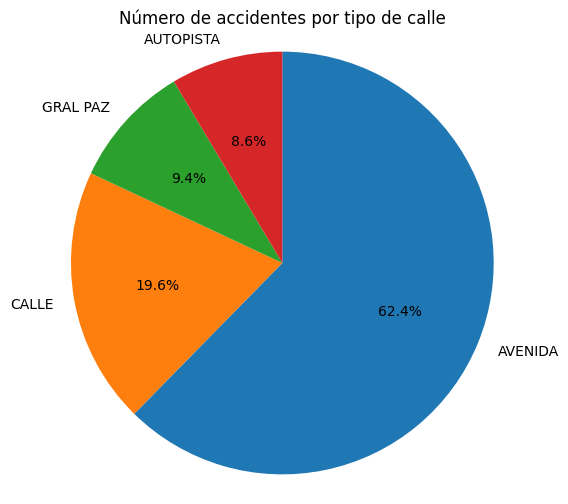

In [24]:
# Gráfico circular
plt.figure(figsize=(6, 6))

# Conteo de homicidios por tipo de calle
conteo_tipos_calle = dfhomicidiosHechos['TIPO_DE_CALLE'].value_counts()

# Crear el gráfico circular
plt.pie(conteo_tipos_calle, labels=conteo_tipos_calle.index, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title('Número de accidentes por tipo de calle')
plt.axis('equal')  # Para asegurar que el círculo sea realmente un círculo



plt.show()

#### 7. Número de accidentes por comuna.
- Análisis y conclusiones:
  - Notamos como en la comuna 1 es donde ocurren la mayor cantidad de accidentes, seguidos de la 4 y la 5 respectivamente.
  - En las que ocurren menos accidentes son las comunas 5 y 6.

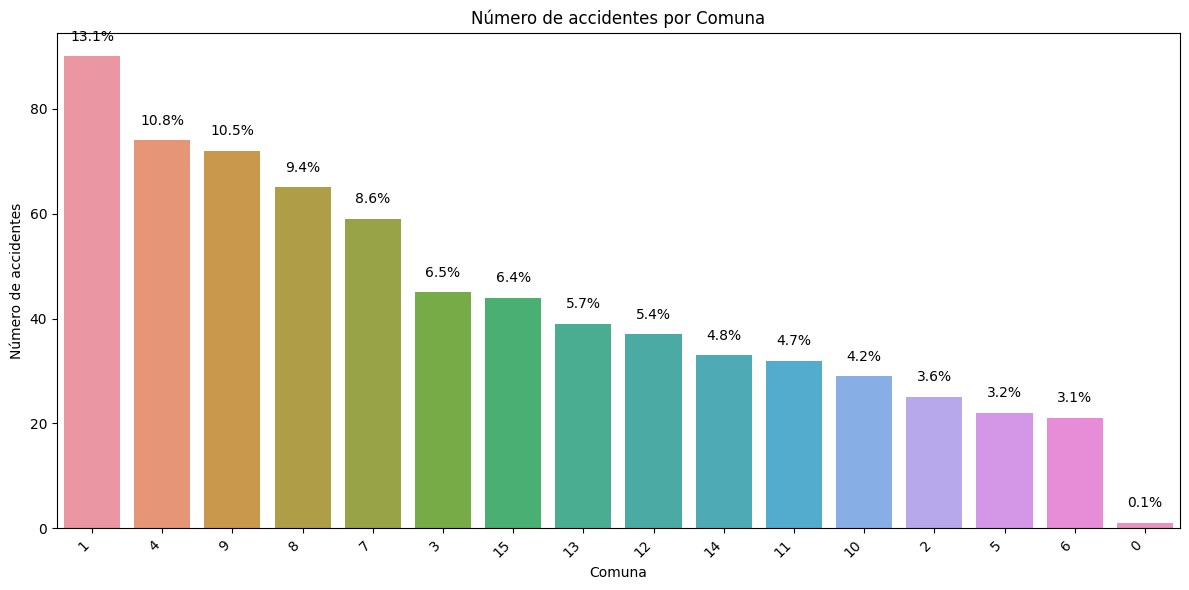

In [25]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='COMUNA', data=dfhomicidiosHechos, order=dfhomicidiosHechos['COMUNA'].value_counts().index)
plt.title('Número de accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos['COMUNA'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 8. Número de accidentes por participantes.
- Análisis y conclusiones:
  - Notamos que la combinación que arroja una mayor cantidads de accidentes es PEATON-PASAJEROS. Lo que quiere decir que el peatón (Víctima distinta de cualquier ocupante de un vehículo) es la victima y el pasajero, que en este caso se refiere a los transportes que transportan pasajeros (colectivos) son la mayor cantidad de acusados.

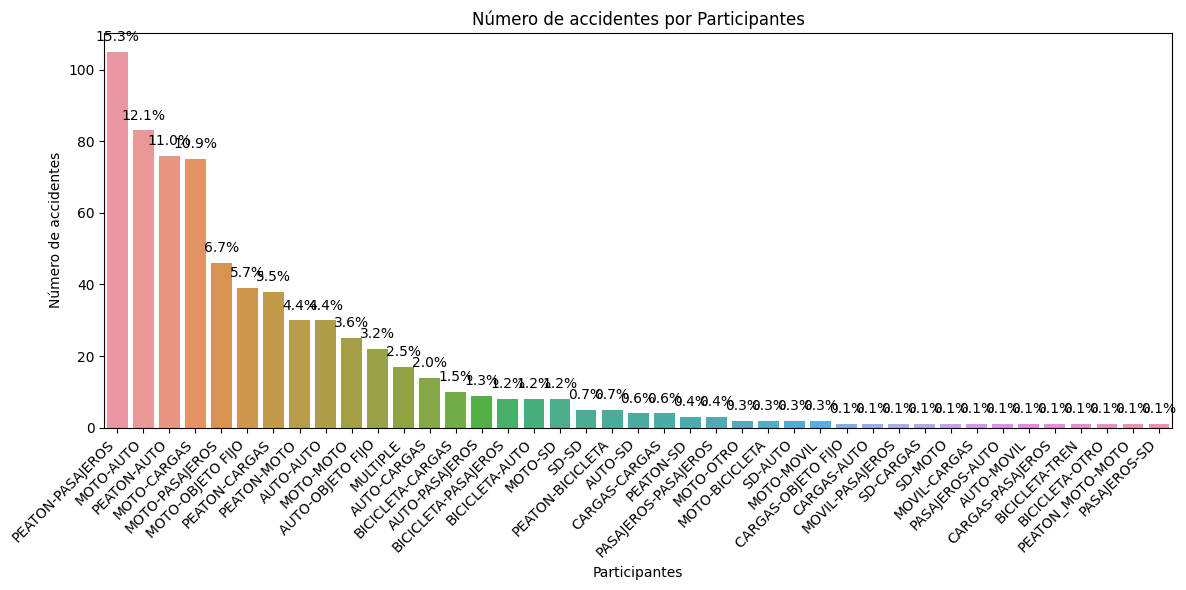

In [26]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='PARTICIPANTES', data=dfhomicidiosHechos, order=dfhomicidiosHechos['PARTICIPANTES'].value_counts().index)
plt.title('Número de accidentes por Participantes')
plt.xlabel('Participantes')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos['PARTICIPANTES'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 9. Número de accidentes por víctima.
- Análisis y conclusiones:
  - Podemos notar que por un gran margen **la mayoría de las victimas fatales son las motos**. Por lo que se podría ahondar mas en este aspecto, ya que se conoce que estos no utilizan las medidas necesarias de seguridad.
  - **El segundo son los peatones**, ya que estos son las únicas victimas que no están sobre un vehiculo, por lo que en sus accidentes son los mas desprotegidos.
  - Luego **podemos ver dos outliers** que no aparecen en la descripción con porcentajes muy bajos (0.1%) para tenerlos en cuenta dentro de este estudio.

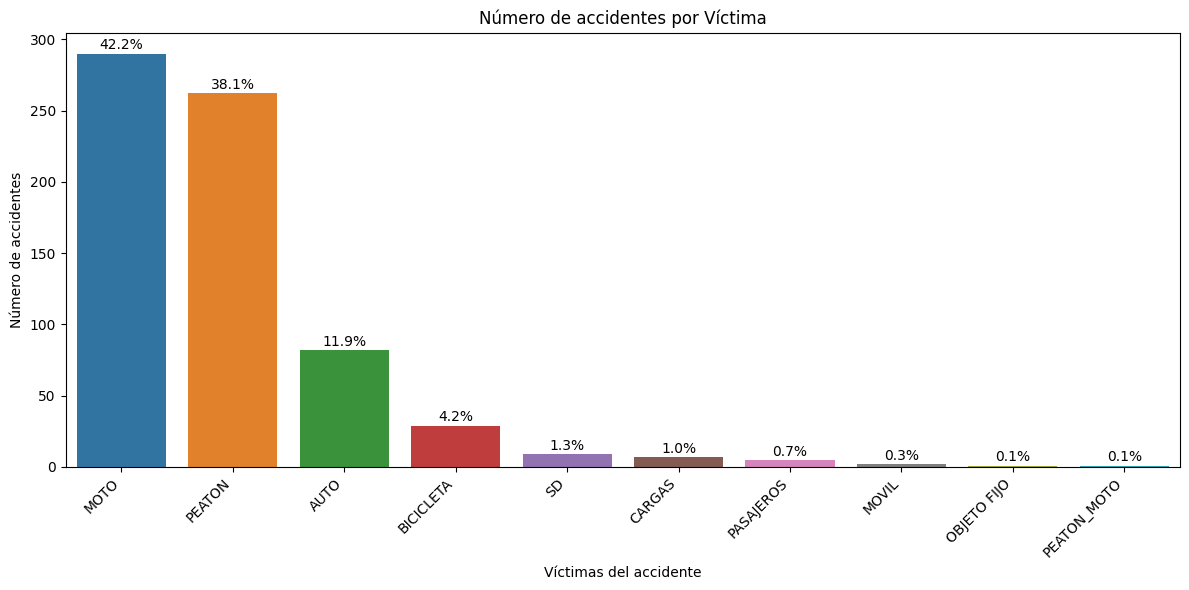

In [27]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', data=dfhomicidiosHechos, order=dfhomicidiosHechos['VICTIMA'].value_counts().index)
plt.title('Número de accidentes por Víctima')
plt.xlabel('Víctimas del accidente')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos['VICTIMA'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 10. Número de accidentes por acusado.
- Análisis y conclusiones:
  - Notamos que **las motos son los mayores responsables de los accidentes** con casi el 30% de ellos.
  - **Los pasajeros son los segundos mayores responsables de los accidentes**. Esto es un dato a tener en cuenta porque uno creería que el margen de acción de estos es menor a los de los demas, ya que no tiene control sobre sus propios movimientos, asi como lo tienen los conductores y los peatones. Algunas razones por las cuales son acusados son : "Intervención en la operación del vehículo", "Incumplimiento de normas de seguridad", "Incentivar al conductor a comportamientos riesgosos", "Daño intencional".
  - **El menos acusado de los accidentes es el tren**, ya que este es uno de los participantes que presenta un movimiento mas lineal, uniforme, y predecible de todos.



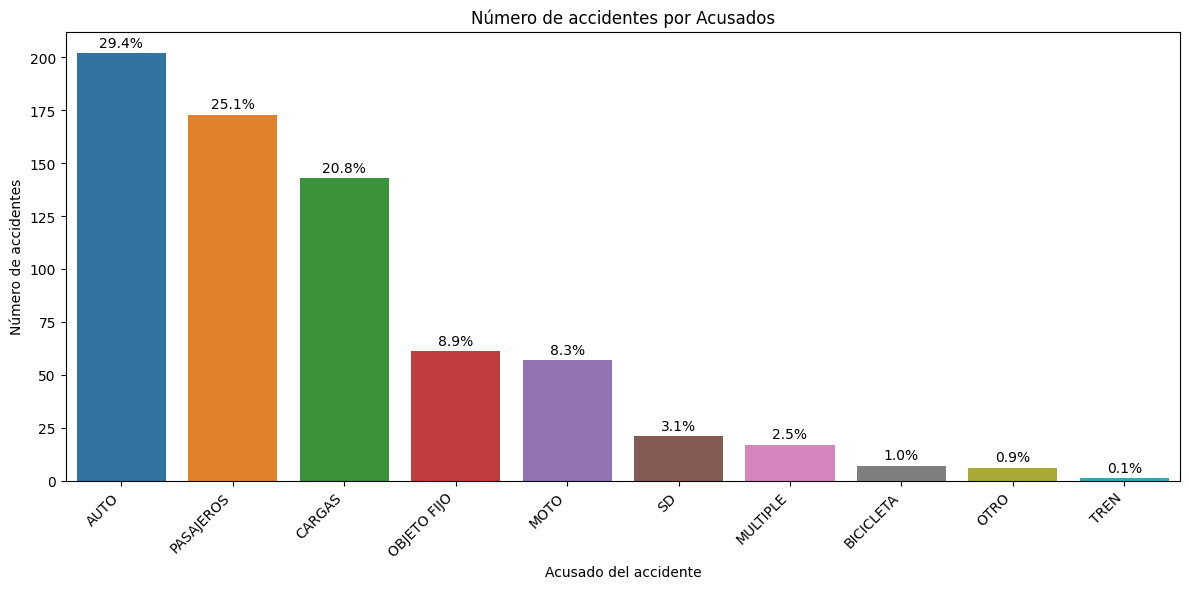

In [28]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='ACUSADO', data=dfhomicidiosHechos, order=dfhomicidiosHechos['ACUSADO'].value_counts().index)
plt.title('Número de accidentes por Acusados')
plt.xlabel('Acusado del accidente')
plt.ylabel('Número de accidentes')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosHechos['ACUSADO'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 11. Matriz de correlación hechos.
- Análisis y conclusiones:
  - La matriz de correlación no arroja grandes correlaciones entre los datos, ya que todos los valores son cercanos a 0 y esto quiere decir que hay una correlacion baja entre estos.

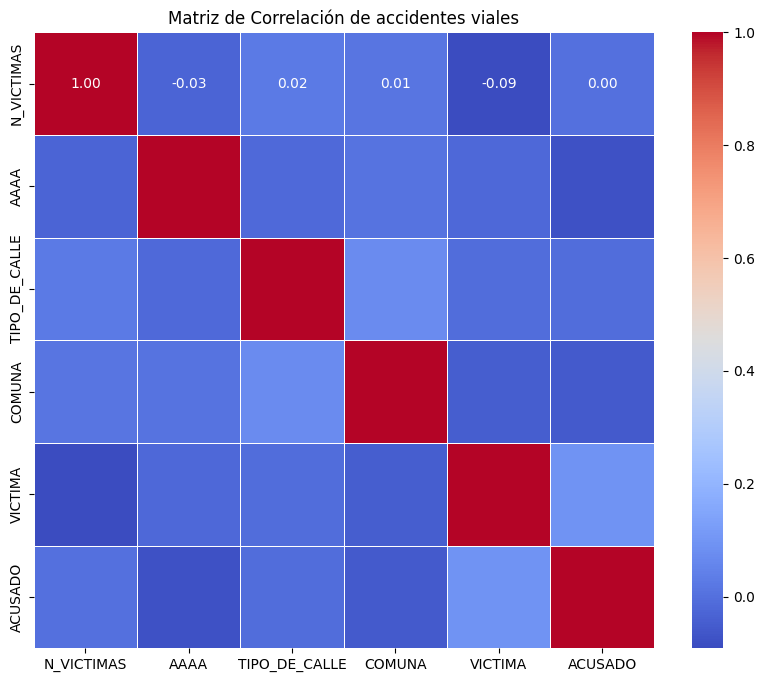

In [29]:
# Seleccionar columnas relevantes
columnas_seleccionadas = ["N_VICTIMAS", "AAAA", "TIPO_DE_CALLE", "COMUNA", "VICTIMA", "ACUSADO"]
df_correlacion = dfhomicidiosHechos[columnas_seleccionadas].copy()

# Convertir variables categóricas a numéricas
columnas_categoricas = df_correlacion.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
    df_correlacion[columna] = pd.Categorical(df_correlacion[columna]).codes

# Calcular la matriz de correlación
matriz_correlacion = df_correlacion.corr(method='kendall')

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de accidentes viales')
plt.show()

#### Cargo el dataframe dfhomicidiosVictimas

In [55]:
dfhomicidiosVictimas=pd.read_csv("DatasetsEDA/dfhomicidiosVictimas.csv")
dfhomicidiosVictimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    int64 
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(4), object(6)
memory usage: 56.1+ KB


#### 12 Número de víctimas por rol.
- Análisis y conlusiones:
  - Notamos que hay un alto porcentaje en el rol de conductor y de los peatones con un 46% y 37.2% respectivamente.

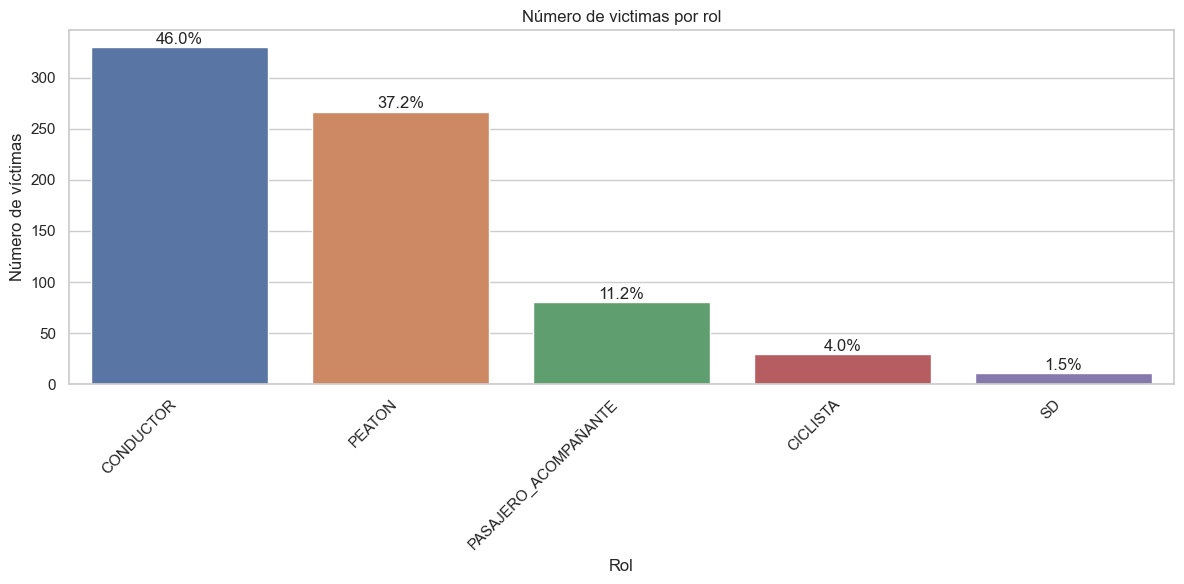

In [52]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='ROL', data=dfhomicidiosVictimas, order=dfhomicidiosVictimas['ROL'].value_counts().index)
plt.title('Número de victimas por rol')
plt.xlabel('Rol')
plt.ylabel('Número de víctimas')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de la barra
total_barras = len(dfhomicidiosVictimas['ROL'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 13. Número de víctimas por rol y sexo
- Análisis y conclusiones:
  - Podemos notar que la mayoría de las víctimas de los accidentes viales son hombres y conductores.

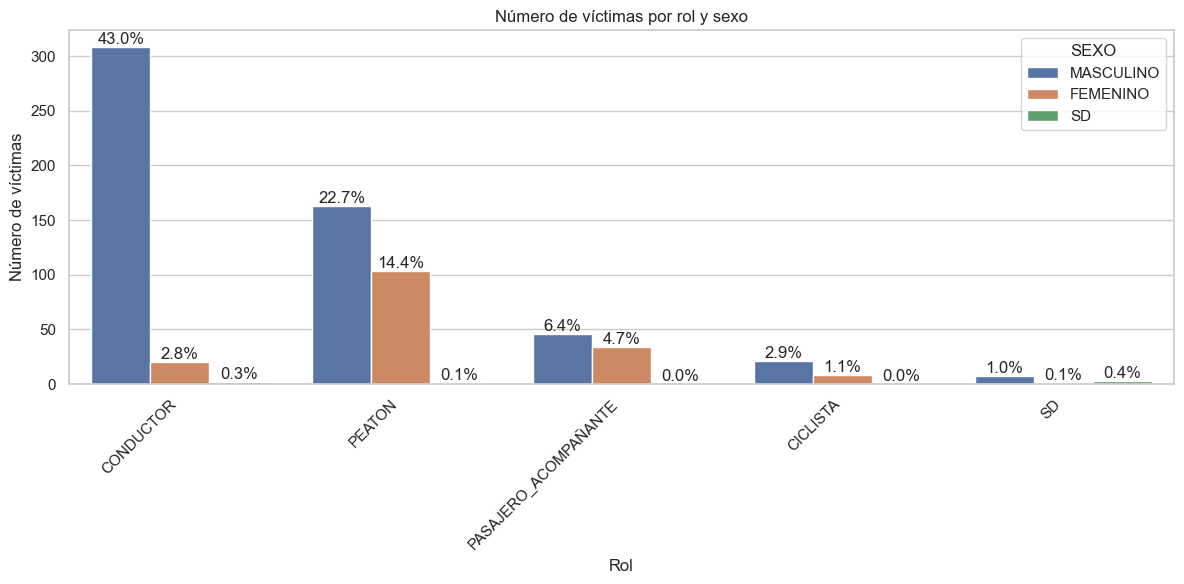

In [53]:
# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.countplot(x='ROL', hue='SEXO', data=dfhomicidiosVictimas, order=dfhomicidiosVictimas['ROL'].value_counts().index)

plt.title('Número de víctimas por rol y sexo')
plt.xlabel('Rol')
plt.ylabel('Número de víctimas')

# Rotar etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Añade porcentaje en la parte superior de cada barra
total_barras = len(dfhomicidiosVictimas)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_barras:.1%}', ha='center')

plt.tight_layout()
plt.show()

#### 14. Días en que fallecieron las victimas luego del accidente.
- Análisis y conclusiones:
  - Vemos como en casi 80% de los casos las víctimas mueren el mismo día del accidente o al siguiente, y muy pocas son las que sobreviven mas de un día a un accidente, se podría decir que si pasas el primer dia, la persona tiene altas chances de sobrevivir.

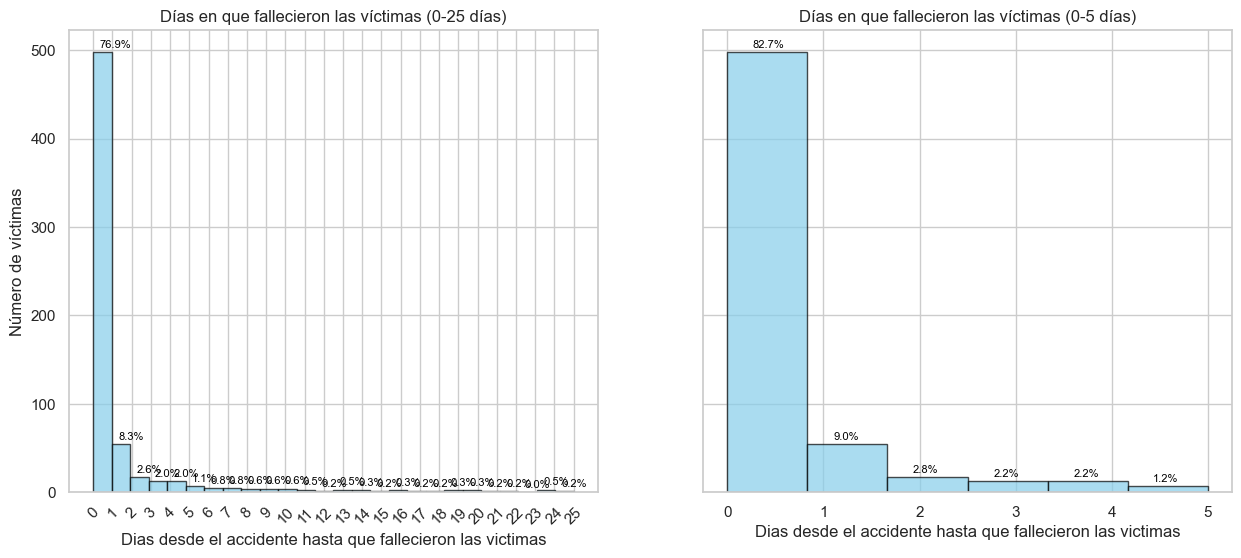

In [67]:
# Convertir las columnas de fecha a objetos datetime
dfhomicidiosVictimas['FECHA'] = pd.to_datetime(dfhomicidiosVictimas['FECHA'])
dfhomicidiosVictimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(dfhomicidiosVictimas['FECHA_FALLECIMIENTO'])

# Calcular la diferencia en días entre las fechas
dfhomicidiosVictimas['DIFERENCIA_DIAS'] = (dfhomicidiosVictimas['FECHA_FALLECIMIENTO'] - dfhomicidiosVictimas['FECHA']).dt.days

# Filtrar los casos donde la diferencia está entre 0 y 25 días
df_filtered_25d = dfhomicidiosVictimas[dfhomicidiosVictimas['DIFERENCIA_DIAS'].between(0, 25)]

# Filtrar los casos donde la diferencia está entre 0 y 5 días
df_filtered_5d = dfhomicidiosVictimas[dfhomicidiosVictimas['DIFERENCIA_DIAS'].between(0, 5)]

# Crear un subplot con 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Grafico de barras para 0-25 días
histogram_25d = df_filtered_25d['DIFERENCIA_DIAS'].plot(kind='hist', bins=26, color='skyblue', edgecolor='black', alpha=0.7, ax=ax1)
ax1.set_title('Días en que fallecieron las víctimas (0-25 días)')
ax1.set_xlabel('Dias desde el accidente hasta que fallecieron las victimas')
ax1.set_ylabel('Número de víctimas')

# Añadir porcentajes en las barras
total_casos_25d = len(df_filtered_25d)
for p in histogram_25d.patches:
    percentage = f'{p.get_height() / total_casos_25d * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 5
    ax1.annotate(percentage, (x, y), fontsize=8, color='black')

# Rotar las etiquetas del eje x
ax1.set_xticks(range(26))
ax1.set_xticklabels(range(26), rotation=45)

# Grafico de barras para 0-5 días
histogram_5d = df_filtered_5d['DIFERENCIA_DIAS'].plot(kind='hist', bins=6, color='skyblue', edgecolor='black', alpha=0.7, ax=ax2)
ax2.set_title('Días en que fallecieron las víctimas (0-5 días)')
ax2.set_xlabel('Dias desde el accidente hasta que fallecieron las victimas')

# Añadir porcentajes en las barras
total_casos_5d = len(df_filtered_5d)
for p in histogram_5d.patches:
    percentage = f'{p.get_height() / total_casos_5d * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 5
    ax2.annotate(percentage, (x, y), fontsize=8, color='black')

# Mostrar el gráfico
plt.show()

#### 14. Días en que fallecieron las victimas luego del accidente.
- Análisis y conclusiones:
  - Vemos como en casi 80% de los casos las víctimas mueren el mismo día del accidente o al siguiente, y muy pocas son las que sobreviven mas de un día a un accidente, se podría decir que si pasas el primer dia, la persona tiene altas chances de sobrevivir.

#### 15. Tabla: Días en que fallecieron las victimas luego del accidente.
- Análisis y conclusiones:
  - Cerca del 70% muere el primer día.

In [69]:
# Convertir las columnas de fecha a objetos datetime
dfhomicidiosVictimas['FECHA'] = pd.to_datetime(dfhomicidiosVictimas['FECHA'])
dfhomicidiosVictimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(dfhomicidiosVictimas['FECHA_FALLECIMIENTO'])

# Calcular la diferencia en días entre las fechas
dfhomicidiosVictimas['DIFERENCIA_DIAS'] = (dfhomicidiosVictimas['FECHA_FALLECIMIENTO'] - dfhomicidiosVictimas['FECHA']).dt.days

# Filtrar los casos donde la diferencia está entre 0 y 5 días
df_filtered_5d = dfhomicidiosVictimas[dfhomicidiosVictimas['DIFERENCIA_DIAS'].between(0, 5)]

# Crear una tabla de frecuencia
tabla_frecuencia = pd.DataFrame(df_filtered_5d['DIFERENCIA_DIAS'].value_counts(sort=False).sort_index()).reset_index()
tabla_frecuencia.columns = ['Días de Diferencia', 'Cantidad de Personas']

# Agregar la columna con el porcentaje
total_personas = len(dfhomicidiosVictimas)
tabla_frecuencia['Porcentaje'] = tabla_frecuencia['Cantidad de Personas'] / total_personas * 100

# Mostrar el DataFrame
print(tabla_frecuencia)

   Días de Diferencia  Cantidad de Personas  Porcentaje
0                   0                   498   69.456067
1                   1                    54    7.531381
2                   2                    17    2.370990
3                   3                    13    1.813110
4                   4                    13    1.813110
5                   5                     7    0.976290


#### 16. Distribución de víctimas por rango hetareo.
- Notamos como el rango hetareo de los 21 a 50 es el rango donde se encuentran la mayoría de victimas.

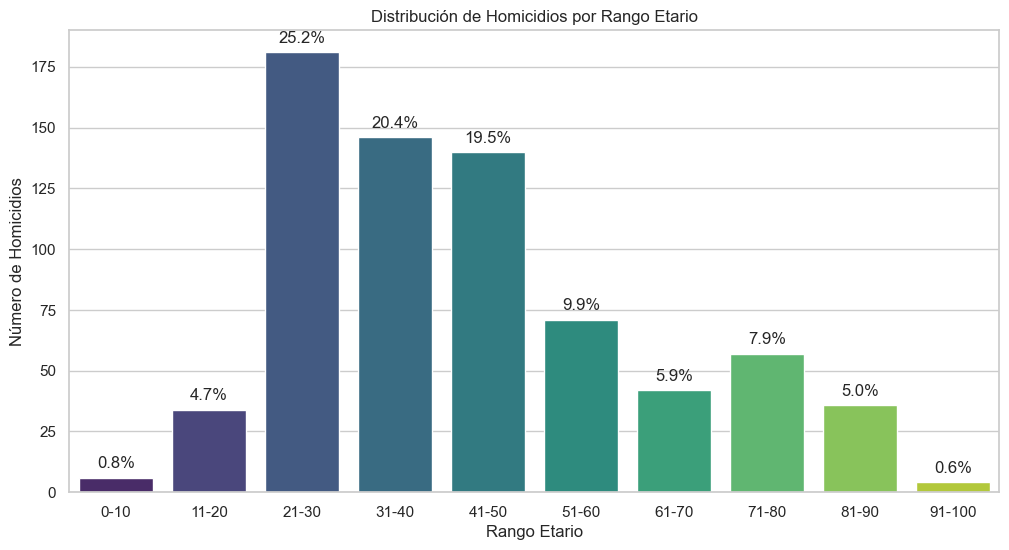

In [78]:
# Ignorar la advertencia específica
warnings.filterwarnings("ignore", message="The default of observed=False is deprecated")


# Convertir la columna 'EDAD' a categoría para agrupar por rangos etarios
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

dfhomicidiosVictimas['EDAD_RANGO'] = pd.cut(dfhomicidiosVictimas['EDAD'], bins=bins, labels=labels, right=False, include_lowest=True)

# Grafico de barras para la edad
plt.figure(figsize=(12, 6))
sns.countplot(x='EDAD_RANGO', data=dfhomicidiosVictimas, order=labels, palette='viridis')
plt.title('Distribución de Homicidios por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Homicidios')

# Añadir porcentaje en las barras
total_homicidios = len(dfhomicidiosVictimas)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/total_homicidios:.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



#### 17. Verificacion de Outliers.
- Análisis y conclusiones.
  - Notamos que no hay outlieres en los gráficos.
  - Notamos el gráfico de los outliers numero de víctimas que es una variable discreta por lo que no existe el 4 en esta columna, nunca hubieron 4 o mas homicidios en un accidente.

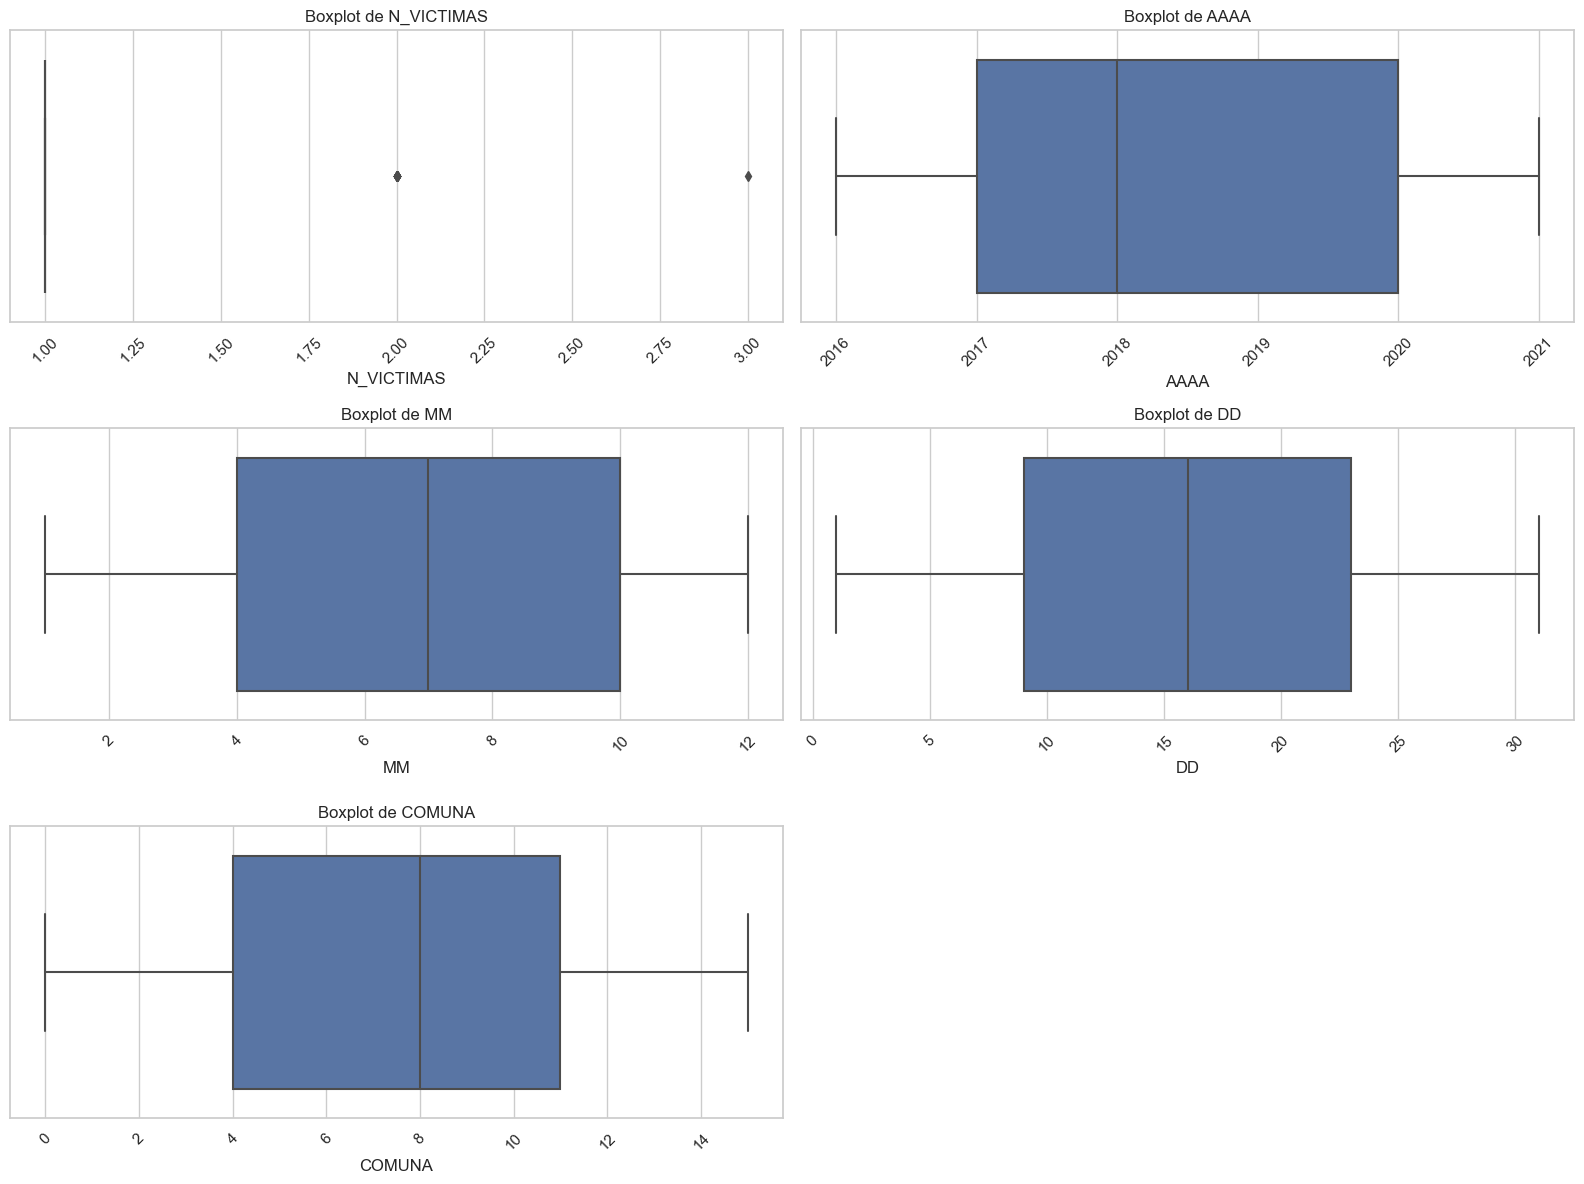

In [85]:
# Convertir 'HORA' a formato datetime
dfhomicidiosHechos['HORA'] = pd.to_datetime(dfhomicidiosHechos['HORA'], errors='coerce')

# Seleccionar columnas numéricas
columnas_numericas = dfhomicidiosHechos.select_dtypes(include=['int64', 'float64']).columns

# Crear gráfico de caja para cada columna numérica
plt.figure(figsize=(16, 12))

# Configurar diseño de subplots
n_rows = len(columnas_numericas) // 2 + len(columnas_numericas) % 2
n_cols = 2

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=dfhomicidiosHechos[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()